In [ ]:
#Entrega 3  Práctica árboles decisión
#TAA LAB 6 - 10 marzo
#Miguel Chaveinte Garcia

In [24]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

PARTE I

In [25]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [26]:
feature_names = [
        "pixel_{}_{}".format(row_idx, col_idx)
        for row_idx in range(8)
        for col_idx in range(8)
    ] #https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/datasets/_base.py#L787

In [27]:
feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [28]:
df = pd.DataFrame (columns= feature_names,data=digitos.data)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [29]:
escala = MinMaxScaler()  # transformamos a intervalo (0,1)

X = escala.fit_transform(digitos.data)

In [30]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [31]:
y = digitos.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33 , random_state=42, stratify=y) #metodo de resorte

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #dimension

((1203, 64), (594, 64), (1203,), (594,))

In [34]:
accuracy = []
for k in range(1,16): #metodo k vecinos desde 1 hasta 15
    clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))

In [35]:
accuracy #tasa de acierto de cada ejecucion

[0.9882154882154882,
 0.9848484848484849,
 0.9865319865319865,
 0.9831649831649831,
 0.9848484848484849,
 0.9797979797979798,
 0.9814814814814815,
 0.9814814814814815,
 0.9797979797979798,
 0.9797979797979798,
 0.9781144781144782,
 0.9781144781144782,
 0.9764309764309764,
 0.9764309764309764,
 0.9696969696969697]

Text(0, 0.5, 'Aciertos')

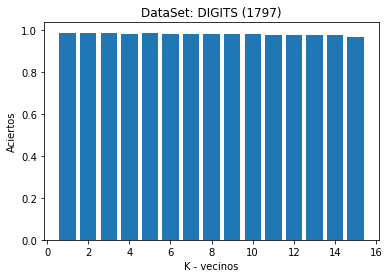

In [36]:
fig, ax =plt.subplots()  # represenatcion diagrama de barras
ax.bar(x=np.arange(1, 16), height=accuracy)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos')

In [37]:
print('Kmax  = ', np.argmax(accuracy)+1, '\tTasa max = ',np.max(accuracy))  #k-optimo y su tasa de aciertos

Kmax  =  1 	Tasa max =  0.9882154882154882


PARTE II

In [38]:
digitos.data != 0  #transformar a 1 o 0

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True,  True, False]])

In [39]:
X = np.array(digitos.data != 0, dtype=float) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [40]:
accuracy = []
for k in range (1, 16):
    clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

In [41]:
accuracy

[0.9040404040404041,
 0.8804713804713805,
 0.9006734006734006,
 0.9141414141414141,
 0.9074074074074074,
 0.9124579124579124,
 0.9175084175084175,
 0.9208754208754208,
 0.9141414141414141,
 0.9090909090909091,
 0.9074074074074074,
 0.9090909090909091,
 0.9040404040404041,
 0.9040404040404041,
 0.898989898989899]

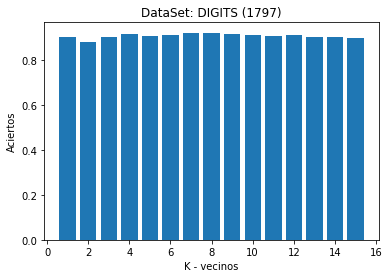

In [42]:
fig, ax = plt.subplots()
ax.bar(x=np.arange(1,16),height=accuracy)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos');

In [43]:
accuracy

[0.9040404040404041,
 0.8804713804713805,
 0.9006734006734006,
 0.9141414141414141,
 0.9074074074074074,
 0.9124579124579124,
 0.9175084175084175,
 0.9208754208754208,
 0.9141414141414141,
 0.9090909090909091,
 0.9074074074074074,
 0.9090909090909091,
 0.9040404040404041,
 0.9040404040404041,
 0.898989898989899]

In [44]:
print('Kmax = ',np.argmax(accuracy)+1, '\tTasa max = ', np.max(accuracy))

Kmax =  8 	Tasa max =  0.9208754208754208


In [45]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo